# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Loading dataset

In [2]:
df=pd.read_excel('dataset.xlsx')
df.head()

lname  bedrooms  livingrooms  kitchen  bathrooms     Sqft  \
0  Thimphu change jiji         1            1        1          1  717.387   
1  Thimphu change jiji         1            1        1          1  717.387   
2  Thimphu change jiji         1            1        1          1  754.305   
3  Thimphu change jiji         1            1        1          1  717.387   
4  Thimphu change jiji         1            1        1          1  409.409   

       rent  year  avg_room_size  
0  4663.015  2003          3.218  
1  4663.015  2005          3.218  
2  4902.982  2005          3.272  
3  4663.015  2007          3.218  
4  2661.158  2007          3.574

# Data preprocessing

In [3]:
print("There are {} duplicate values.".format(df.duplicated().sum()))
df[df.duplicated(keep=False)].head(10)

There are 11 duplicate values.


lname  bedrooms  livingrooms  kitchen  bathrooms  \
37      Thimphu PWD colony         2            1        1          2   
38      Thimphu PWD colony         2            1        1          2   
39      Thimphu PWD colony         2            1        1          2   
40      Thimphu PWD colony         2            1        1          2   
41      Thimphu PWD colony         2            1        1          2   
43      Thimphu PWD colony         2            1        1          1   
44      Thimphu PWD colony         2            1        1          1   
45      Thimphu PWD colony         2            1        1          1   
46      Thimphu PWD colony         2            1        1          1   
79  Thimphu Medical Colony         2            1        1          2   

        Sqft      rent  year  avg_room_size  
37  312.8300  2033.395  1980          2.327  
38  312.8300  2033.395  1980          2.327  
39  312.8300  2033.395  1980          2.327  
40  312.8300  2033.395  1980          2.327  
41  312.8300  2033.395  1980          2.327  
43  367.1900  2386.740  1980          2.773  
44  367.1900  2386.740  1980          2.773  
45  367.1900  2386.740  1980          2.773  
46  367.1900  2386.740  1980          2.773  
79  627.4156  4078.200  1975          2.934

In [4]:
df = df.drop_duplicates()
df = df.reset_index(drop=True)

print("There are {} duplicate values.".format(df.duplicated().sum()))
df[df.duplicated(keep=False)]

There are 0 duplicate values.


Empty DataFrame
Columns: [lname, bedrooms, livingrooms, kitchen, bathrooms, Sqft, rent, year, avg_room_size]
Index: []

# Relationship between features

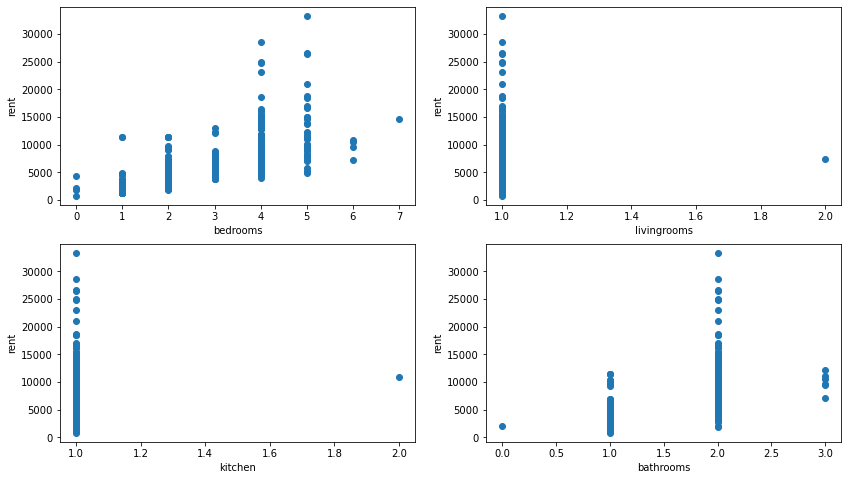

In [5]:
plt.figure(figsize=(14, 8))

plt.subplot(2, 2, 1)
plt.scatter(x=df["bedrooms"], y=df["rent"])
plt.xlabel("bedrooms")
plt.ylabel("rent")

plt.subplot(2, 2, 2)
plt.scatter(x=df["livingrooms"], y=df["rent"])
plt.xlabel("livingrooms")
plt.ylabel("rent")

plt.subplot(2, 2, 3)
plt.scatter(x=df["kitchen"], y=df["rent"])
plt.xlabel("kitchen")
plt.ylabel("rent")

plt.subplot(2, 2, 4)
plt.scatter(x=df["bathrooms"], y=df["rent"])
plt.xlabel("bathrooms")
plt.ylabel("rent")

plt.savefig("scatterplots1.png", bbox_inches="tight")
plt.show()

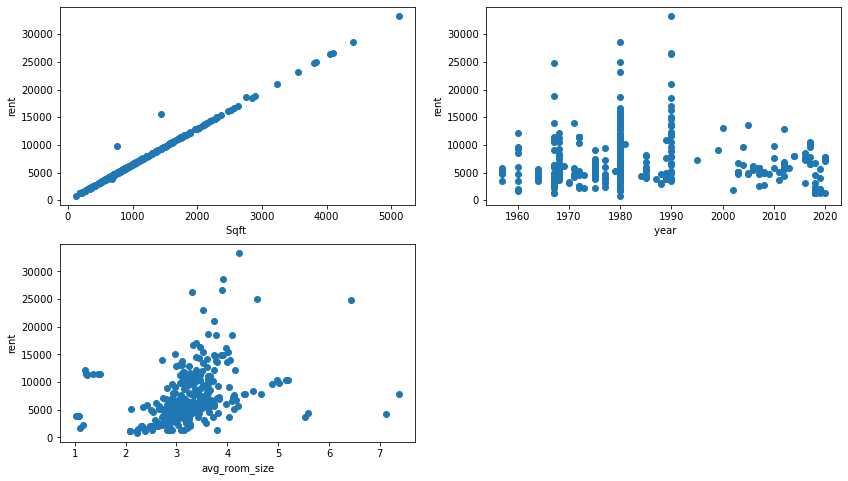

In [6]:
plt.figure(figsize=(14, 8))
plt.subplot(2, 2, 1)
plt.scatter(x=df["Sqft"], y=df["rent"])
plt.xlabel("Sqft ")
plt.ylabel("rent")

plt.subplot(2, 2, 2)
plt.scatter(x=df["year"], y=df["rent"])
plt.xlabel(" year")
plt.ylabel("rent")

plt.subplot(2, 2, 3)
plt.scatter(x=df["avg_room_size"], y=df["rent"])
plt.xlabel("avg_room_size")
plt.ylabel("rent")

plt.savefig("scatterplots.png", bbox_inches="tight")
plt.show()

# Features Selection

In [7]:
df.corr()

bedrooms  livingrooms   kitchen  bathrooms      Sqft      rent  \
bedrooms       1.000000     0.048601  0.127430   0.656640  0.676421  0.675035   
livingrooms    0.048601     1.000000 -0.002513   0.036286  0.007049  0.006702   
kitchen        0.127430    -0.002513  1.000000   0.036286  0.045966  0.045395   
bathrooms      0.656640     0.036286  0.036286   1.000000  0.464590  0.461803   
Sqft           0.676421     0.007049  0.045966   0.464590  1.000000  0.996171   
rent           0.675035     0.006702  0.045395   0.461803  0.996171  1.000000   
year          -0.142082    -0.050107  0.011202  -0.235706 -0.089499 -0.086217   
avg_room_size  0.318389    -0.007105  0.002874   0.209673  0.361223  0.361225   

                   year  avg_room_size  
bedrooms      -0.142082       0.318389  
livingrooms   -0.050107      -0.007105  
kitchen        0.011202       0.002874  
bathrooms     -0.235706       0.209673  
Sqft          -0.089499       0.361223  
rent          -0.086217       0.361225  
year           1.000000       0.102994  
avg_room_size  0.102994       1.000000

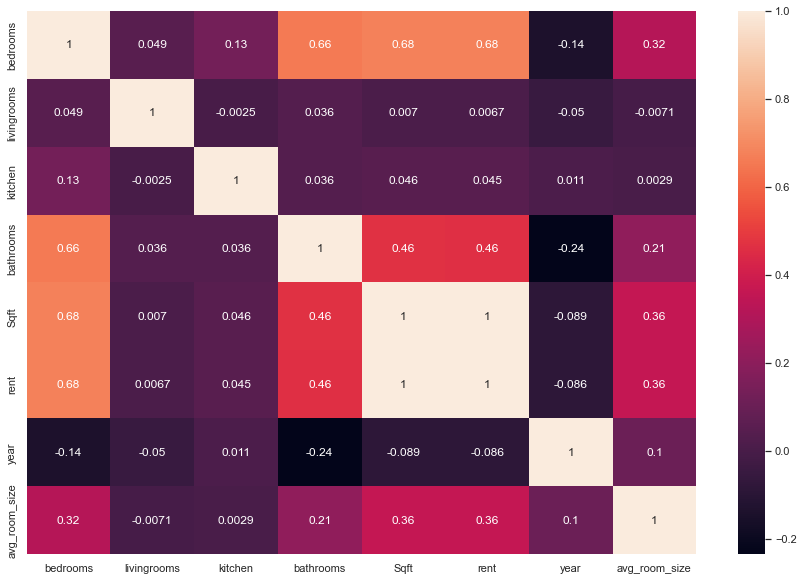

In [8]:
corr = df.corr()
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(data= corr,annot=True)

plt.savefig("corr.png", bbox_inches="tight")
plt.show()

In [9]:
df.corr()['rent'].sort_values()

year            -0.086217
livingrooms      0.006702
kitchen          0.045395
avg_room_size    0.361225
bathrooms        0.461803
bedrooms         0.675035
Sqft             0.996171
rent             1.000000
Name: rent, dtype: float64

# Outliers Detection

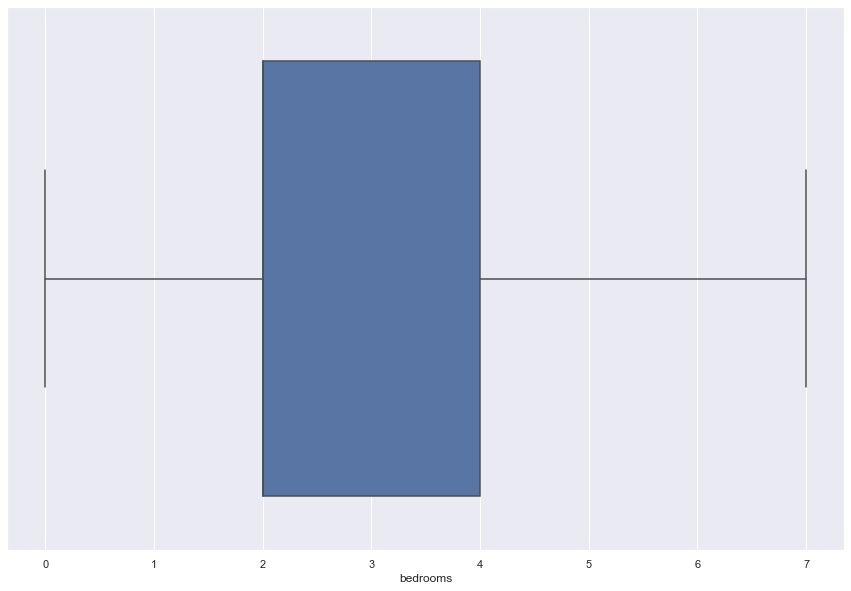

In [10]:
sns.boxplot(x=df['bedrooms'])
plt.show()

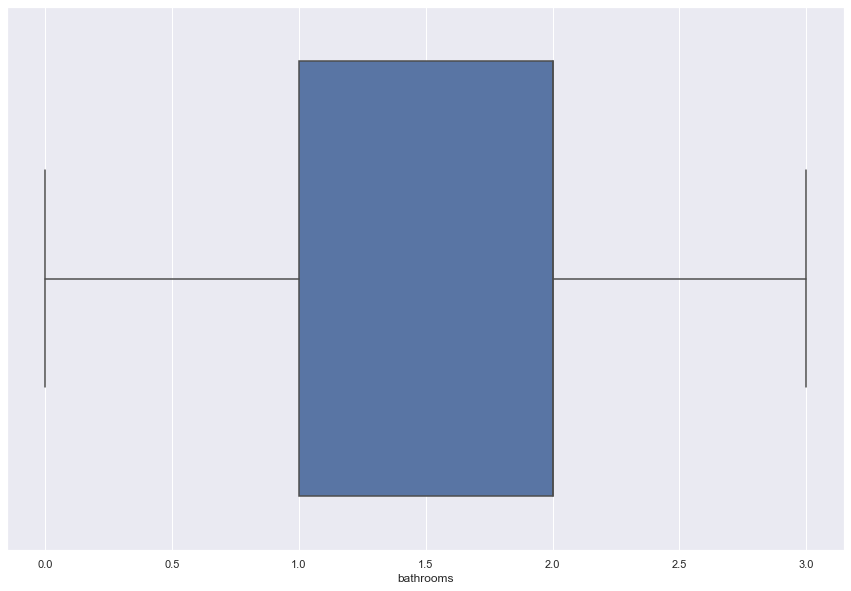

In [11]:
sns.boxplot(x=df['bathrooms'])
plt.show()

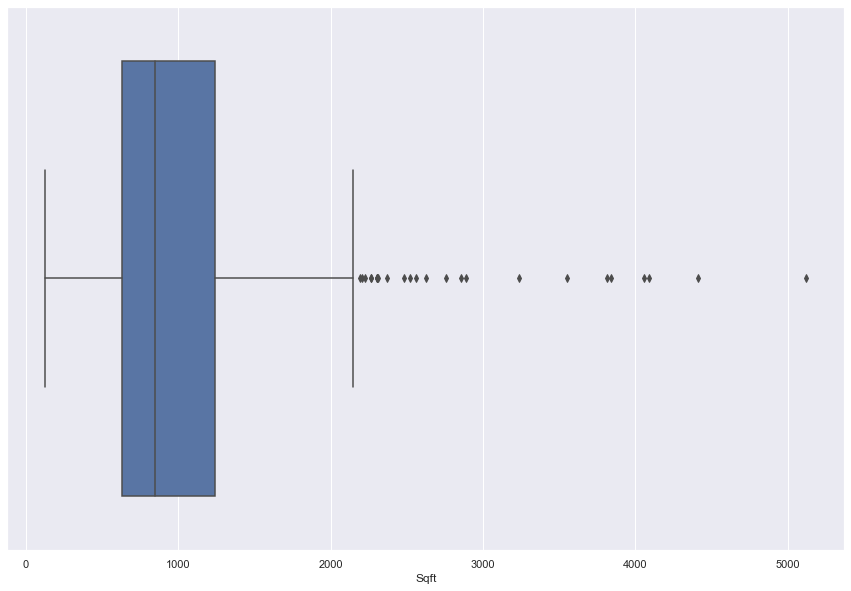

In [12]:
sns.boxplot(x=df['Sqft'])
plt.show()

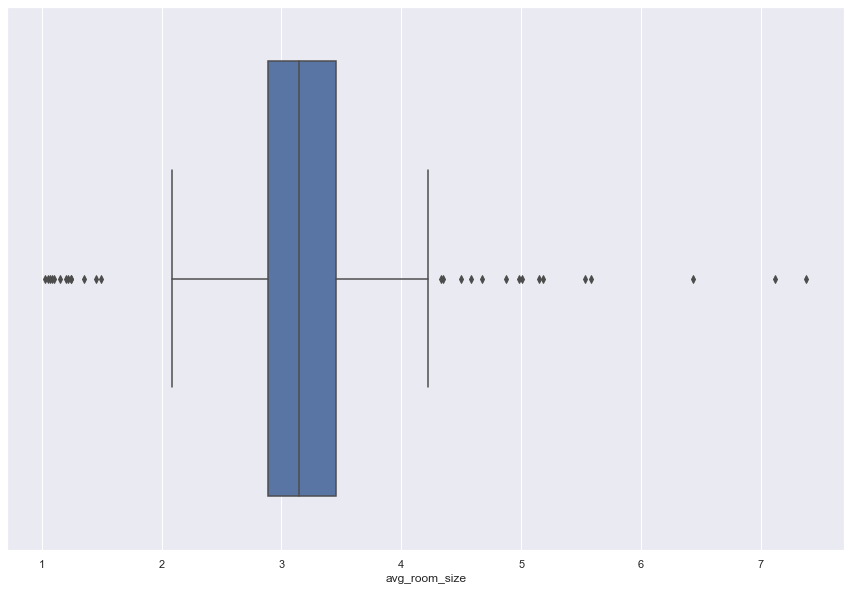

In [13]:
sns.boxplot(x=df['avg_room_size'])
plt.show()

# Model Training

In [14]:
X = df.drop(columns=["rent","year", "avg_room_size"])
Y = df["rent"]

In [15]:
X.head()

lname  bedrooms  livingrooms  kitchen  bathrooms     Sqft
0  Thimphu change jiji         1            1        1          1  717.387
1  Thimphu change jiji         1            1        1          1  717.387
2  Thimphu change jiji         1            1        1          1  754.305
3  Thimphu change jiji         1            1        1          1  717.387
4  Thimphu change jiji         1            1        1          1  409.409

In [16]:
X.dtypes

lname           object
bedrooms         int64
livingrooms      int64
kitchen          int64
bathrooms        int64
Sqft           float64
dtype: object

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state = 5)

In [18]:
n_cols = X.select_dtypes(include=['int64','float64']).columns
n_cols

Index(['bedrooms', 'livingrooms', 'kitchen', 'bathrooms', 'Sqft'], dtype='object')

In [19]:
c_cols = X.select_dtypes(include=['object']).columns
c_cols

Index(['lname'], dtype='object')

In [20]:
n_index = [X.columns.get_loc(col) for col in n_cols]
n_index

[1, 2, 3, 4, 5]

In [21]:
c_index = [X.columns.get_loc(col) for col in c_cols]
c_index

[0]

In [22]:
n_transform = Pipeline(steps=
                      [
                          ('imputeN',SimpleImputer(strategy='mean')),
                          ('scale',StandardScaler())
                      ]
                      )

In [23]:
c_transform = Pipeline(steps=
                      [
                          ('imputeC',SimpleImputer(strategy='most_frequent')),
                          ('oneHot',OneHotEncoder(handle_unknown='ignore'))
                      ]
                      )

In [24]:
from sklearn.compose import ColumnTransformer
pre = ColumnTransformer(transformers=
                       [
                           ('numeric', n_transform, n_index),
                           ('categorical', c_transform, c_index)
                       ]
                       )

# Multiple Linear Regression

In [25]:
from sklearn.linear_model import LinearRegression
estimator = LinearRegression()

In [26]:
pipelinemodel = Pipeline(steps=
                        [
                            ('processing', pre),
                            ('est', estimator)
                        ])

In [27]:
X_train = X_train.values

In [28]:
type(X_train)

numpy.ndarray

In [29]:
X_test = X_test.values

In [30]:
pipelinemodel.fit(X_train,y_train)

Pipeline(steps=[('processing',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputeN',
                                                                   SimpleImputer()),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  [1, 2, 3, 4, 5]),
                                                 ('categorical',
                                                  Pipeline(steps=[('imputeC',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('oneHot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [0])])),
               

In [31]:
import pickle
pickle.dump(pipelinemodel, open('rent_model_integration.pkl','wb'))

In [32]:
pipelinemodel.score(X_train,y_train)

0.9921395828361853

In [33]:
pipelinemodel.score(X_test,y_test)

0.9992771771742526

In [34]:
# make predictions
y_pred = pipelinemodel.predict(X_test)

In [35]:
#calculating R-squared
from sklearn.metrics import r2_score
lin_r2 = r2_score(y_test, y_pred)

print("Liner Regression R-squared: {}".format(lin_r2))

Liner Regression R-squared: 0.9992771771742526


In [36]:
# calculate root mean squared error (RMSE)
from sklearn.metrics import mean_squared_error

lin_mse = mean_squared_error(y_pred, y_test)
lin_rmse = np.sqrt(lin_mse)
print("Liner Regression RMSE: {}".format(lin_rmse))

Liner Regression RMSE: 126.27977652074972


Text(0.5, 1.0, 'Actual Vs. Predicted')

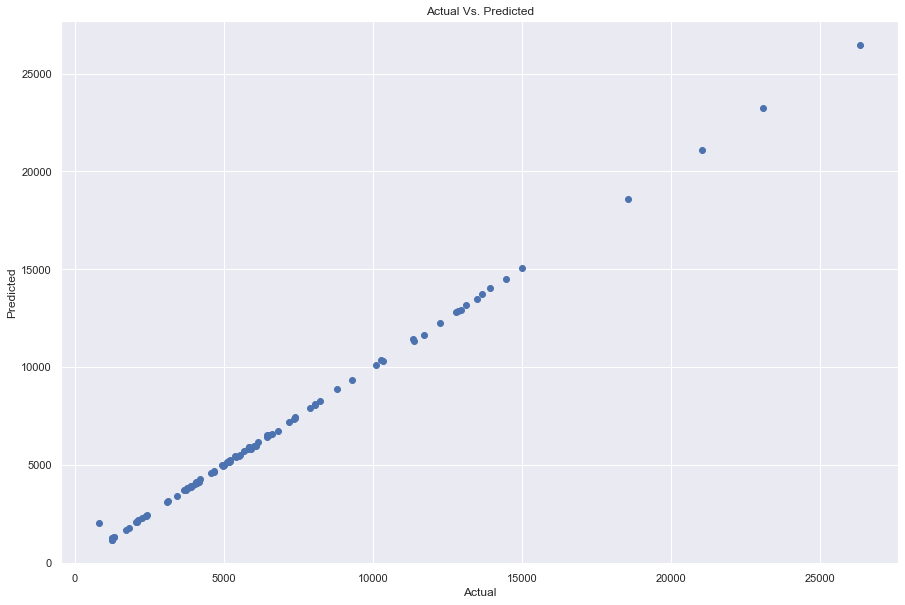

In [37]:
#Plotting
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual Vs. Predicted')

In [38]:
#predicted values
pred_y_df=pd.DataFrame({'Actual Value':y_test,'Predicted value': y_pred,'Difference':y_test-y_pred})
pred_y_df[0:20]

Actual Value  Predicted value  Difference
218     8048.3500      8068.821917  -20.471917
191     4200.9500      4269.584239  -68.634239
117    14457.9900     14475.165472  -17.175472
50     12960.5400     12897.219280   63.320720
347     3734.0900      3725.524733    8.565267
282     2433.5600      2436.053312   -2.493312
195     5206.3300      5179.102689   27.227311
327     2268.8500      2257.743234   11.106766
123    12872.4500     12878.975420   -6.525420
360     4987.4214      4913.082768   74.338632
308     3759.9700      3796.537253  -36.567253
161     4152.3300      4124.476596   27.853404
52     26361.0700     26437.181566  -76.111566
185     4553.4000      4592.085292  -38.685292
176     5169.2500      5122.031958   47.218042
139    10290.9700     10353.723676  -62.753676
230     3856.9600      3888.595991  -31.635991
333     5851.3600      5842.586091    8.773909
88      5856.7700      5888.296028  -31.526028
350     4065.9600      4094.603668  -28.643668

# Saving Model

In [39]:
import pickle
pickle.dump(pipelinemodel, open('rent_model.pkl','wb'))